In [0]:
%matplotlib inline


# Tick formatters


Show the different tick formatters.



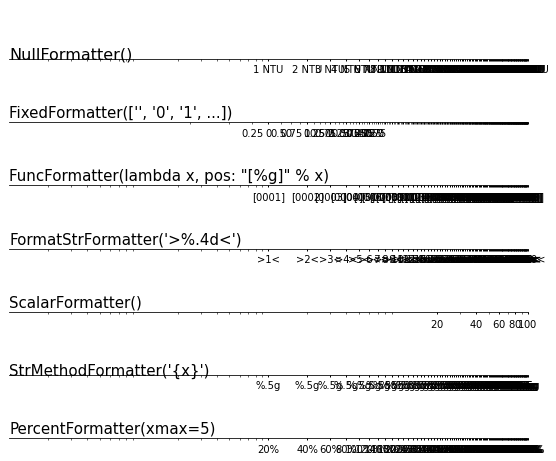

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


# Setup a plot such that only the bottom spine is shown
def setup(ax):
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')
    ax.yaxis.set_major_locator(ticker.NullLocator())
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.tick_params(which='major', width=1.0000, length=2)
    #ax.tick_params(which='minor', width=0.75, length=2.5, labelsize=10)
    ax.set_xlim(0.01, 100)
    ax.set_xscale("log")
    ax.patch.set_alpha(0.0)
    


fig = plt.figure(figsize=(8, 6))
n = 7

# Null formatter
ax = fig.add_subplot(n, 1, 1)
setup(ax)
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=1))
#ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.25))
ax.xaxis.set_major_formatter(ticker.EngFormatter(unit='NTU', places=0,useMathText=None))
#ax.xaxis.set_minor_formatter(ticker.NullFormatter())
ax.text(0.000000, 0.00001, "NullFormatter()", fontsize=16, transform=ax.transAxes)

# Fixed formatter
ax = fig.add_subplot(n, 1, 2)
setup(ax)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1.0))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.25))
majors = ["", "0", "1", "2", "3", "4", "5"]
ax.xaxis.set_major_formatter(ticker.FixedFormatter(majors))
minors = [""] + ["%.2f" % (x-int(x)) if (x-int(x))
                 else "" for x in np.arange(0, 5, 0.25)]
ax.xaxis.set_minor_formatter(ticker.FixedFormatter(minors))
ax.text(0.0, 0.1, "FixedFormatter(['', '0', '1', ...])",
        fontsize=15, transform=ax.transAxes)


# FuncFormatter can be used as a decorator
@ticker.FuncFormatter
def major_formatter(x, pos):
    return "[%.4d]" % x


ax = fig.add_subplot(n, 1, 3)
setup(ax)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1.00))
#ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.25))
ax.xaxis.set_major_formatter(major_formatter)
ax.text(0.0, 0.1, 'FuncFormatter(lambda x, pos: "[%g]" % x)',
        fontsize=15, transform=ax.transAxes)


# FormatStr formatter
ax = fig.add_subplot(n, 1, 4)
setup(ax)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1.00))
#ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.25))
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter(">%.4g<"))
ax.text(0.0, 0.1, "FormatStrFormatter('>%.4d<')",
        fontsize=15, transform=ax.transAxes)

# Scalar formatter
ax = fig.add_subplot(n, 1, 5)
setup(ax)
ax.xaxis.set_major_locator(ticker.AutoLocator())
#ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
ax.xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax.text(0.0, 0.1, "ScalarFormatter()", fontsize=15, transform=ax.transAxes)

# StrMethod formatter
ax = fig.add_subplot(n, 1, 6)
setup(ax)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1.00))
#ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.25))
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x}"))
ax.text(0.0, 0.001, "StrMethodFormatter('{x}')",
        fontsize=15, transform=ax.transAxes)

# Percent formatter
ax = fig.add_subplot(n, 1, 7)
setup(ax)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1.00))
#ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.25))
ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=5))
ax.text(0.001, 0.1, "PercentFormatter(xmax=5)",
        fontsize=15, transform=ax.transAxes)

# Push the top of the top axes outside the figure because we only show the
# bottom spine.
fig.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=1.05)

plt.show()

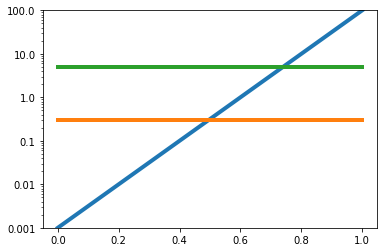

In [52]:
from matplotlib import pyplot as plt
from matplotlib import ticker
import numpy as np

N = 50
x = np.linspace(0,1,N)
y = np.logspace(-3, 2, N)

plt.plot(x, y, linewidth=4)
plt.plot([0, 1], [0.3, 0.3], linewidth=4)
plt.plot([0, 1], [5, 5], linewidth=4)
plt.yscale('log')
plt.ylim(bottom=0.001,top=100)
plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter())
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter("{x}"))
plt.show()